In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as rf

In [2]:
df = pd.read_csv('test1_modify6.csv')
df.columns

Index(['year', 'month', 'day', 'hour', 'dow', 'windforce', 'discomfort',
       'regular', 'casual', 'group'],
      dtype='object')

In [3]:
features = ['year', 'month', 'day', 'hour', 'dow', 'windforce', 'discomfort']
label = 'regular'

In [4]:
X, y = df[features], df[label]

In [6]:
model = rf()
model.fit(X,y)

RandomForestRegressor()

# XAI(Explainable AI, 설명가능한 인공지능)
- 인간 사용자가 기계학습 알고리즘에 의해 생성된 결과/출력을 이해하고 신뢰할 수 있는 프로세스 또는 방법론
- Model Planning -> 속도, 정확도, **해석력(Explainability, Interpretability)**
- 해석력은 전역(global) 해석력, 지역(local) 해석력이 있다.

## 알고리즘
- PDP, SAHAP

In [7]:
import seaborn as sns

In [8]:
# 시각화

# 인사이트를 얻을때, EDA에서 패턴을 눈으로 확인할 수 있게 시각화를 다룸
# feature-label의 관계를 이해하기 위해 label을 직접 입력
# 그러나 PDP에서는 label을 입력하지 않고 모델의 예측값을 이용

# 모델이 제대로 학습을 했다면 출력된 그래프를 이해하기 있을 것이라는 가정에서 시작
# 예 시간대에 따라서 사람들이 이용량 추이가 이러한 경향을 보인다는 것을 ML 알고리즘 도 안다는 가정

### PDP
- Partial Dependence Plot, 부분 의존도
- feature의 수치를 선형을 변형하면서 알고리즘 해석 능력이 얼마나 증가하고 감소하는지 관찰하는 방식
- feature-label 관계를 부분적으로 알아봄(모든 feature가 아님)
- 모든 feature가 아닌 한두개의 feature를 골라 feature의 값이 label에 어떤 영향을 주는지 해석
- ref:
- Zhao et el(2019) - Casual Interpretation of black-bok models
- Wright et el - Interpreting black box machine learning model ~ SAS Institute
- Goldstein et el(2015) - Peeking inside the Black Box
ox

In [12]:
from sklearn.inspection import PartialDependenceDisplay as pdp
import matplotlib.pyplot as plt

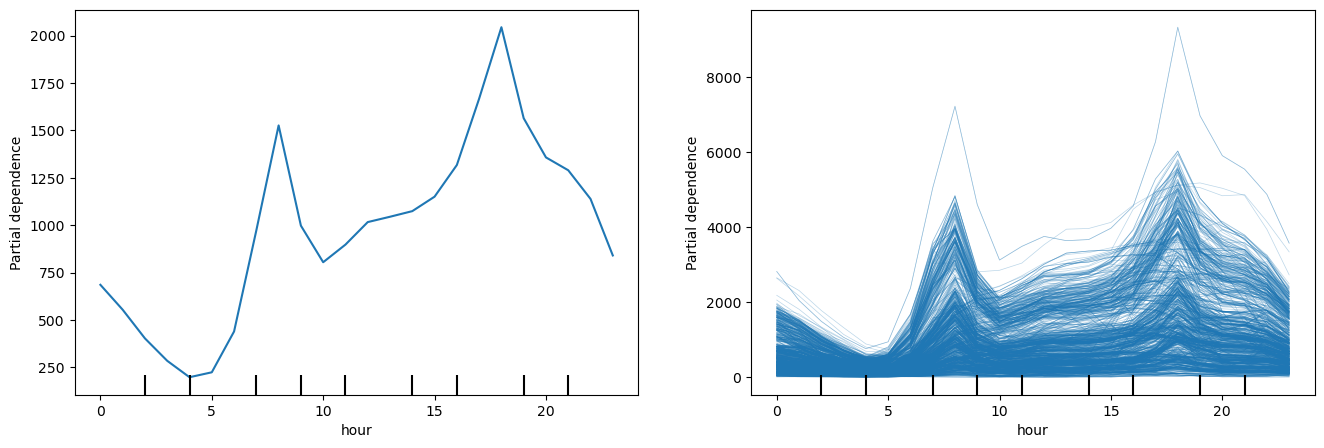

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(16,5)
target = ['hour']
pdp.from_estimator(model, X, target, kind='average', ax=ax1)
pdp.from_estimator(model, X, target, kind='individual', ax=ax2) # ICE

# ICE = Individual Condition Expectations, 개별 조건부 기대치
# 한 row에 대해서 hour 를 기준으로 해당 Column을 값을 변화하여 예측 모델의 결과값을 모두 출력(hour에 변화에 따른)
# 한 row마다 그래프가 나옴 -> 한 row에서 특정 column값 만 변화 시키면서 예측값을 여러개 도출
# PDP는 ICE의 평균이다.

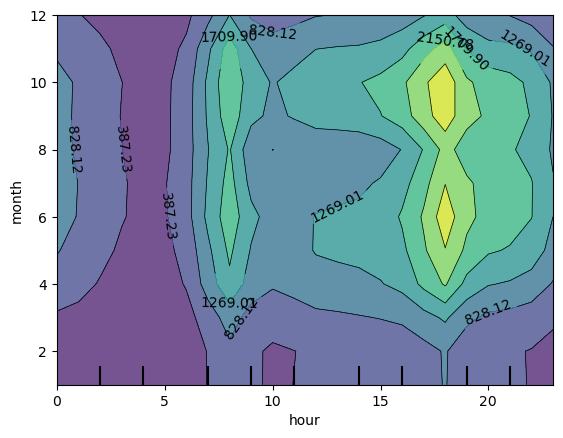

In [18]:
target = ('hour', 'month')
pdp.from_estimator(model, X, [target], kind='average')

# 밝을 수록 모델의 예측값이 커지는 영역
# 어두울 수록 모델의 예측 값이 작아짐
# 12, 1~3월은 이용량이 많지 않지만 6~10월은 밤에 이용량이 조금 있음
# 7,8시 많이 이용한다 했는데 6,7,9,10월에 사용하지만 1,2,월은 여름대비 사용량이 적음

### SAHAP
- 게임 이론상 최적화 된 shapley value 찾기
- shapley value : 스포츠 팀에서 각 선수가 승리에 기여한 정도 -> 수치화한 개념
- ref : Shapley(1953), Lundberg(2017)

#### SHAP 프로세스
- 해석 대상 row인 i에서 j(feature)가 특정값일때 shapley value 찾기
1. 학습이 끝난 모델(f)과 해석할 row(i)를 준비
2. 데이터셋으로부터 랜덤한 row(z)를 선택
3. i와 z를 f에 넣고 예측값(predict)을 확인
4. shapley value을 알아볼 column(j)의 값을 맞교환 함
5. 4에서 맞교환한 i와 j를 f에 넣고, model.predict()를 적용함
6. row i에서 j의 값을 비교(원본 예측값 vs i와 z를 맞교환 했을 때 예측값)
7. row z에서 j의 값을 비교(원본 예측값 vs z와 i를 맞교환 했을 때 예측값)
8. 2 ~ 7번 단계를 n회 반복합니다, i의 j의 값이 원보일 때와 아니었을 때를 비교함
9. 8에서 비교할 때, 비교한 값들을 평균내면 원본이었을 때가 그렇지 않았을 때 대비 편균적으로 + 또는 - 방향으로 얼마나 기여했는가 나옴 -> shapley value

In [21]:
import shap

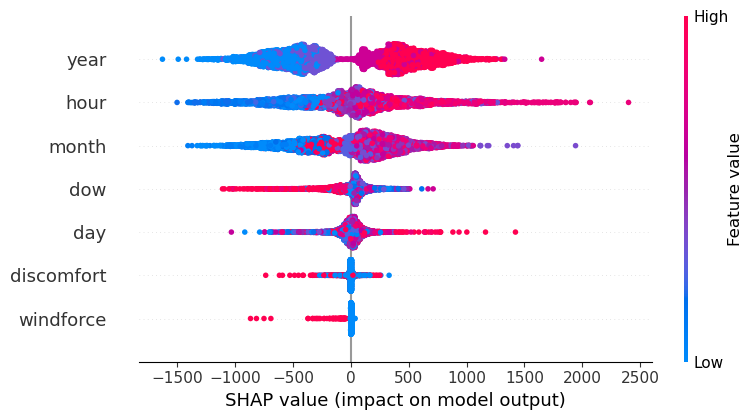

In [22]:
shap.initjs()
shap_values = shap.TreeExplainer(model).shap_values(X[::5])
shap.summary_plot(shap_values, X[::5])

#### shap 해석
- 원래 3이었는데 3이 아닌 값으로 변경했을 때, 얼마나 줄어들거나 늘어났는지
- 혹은 3이 아닌 것에서 3으로 바꾸었을때, 얼마나 줄거나 늘어났는지
- 특정 column의 값이 특정 수치 였을 때, 어떤 값이 예측 결과에 얼마나 큰 영향을 주는지 파악

In [24]:
# Local
shap.initjs()
single_row = X.iloc[500]
single_row

year          2017
month            1
day             30
hour            17
dow              0
windforce        0
discomfort       0
Name: 500, dtype: int64

In [25]:
explainer = shap.TreeExplainer(model)
single_value = explainer.shap_values(single_row)
shap.force_plot(explainer.expected_value, single_value, single_row)

# 빨간색은 예측결과 값에 + 영향을 미치는 요소
# 파란색은 예측결과 값에 - 영향을 미치는 요소
# 한 row의 예측결과를 해석한 것으로, 예측 값이 85.65
# 이 값이 나온 근거는 hour가 17이면 아래와 같은 +영향을
# year가 2017, month가 1 이면 아래와 같은 -영향을 미친것이 합하여 85점이 나옴

### Bagging(Bootstrap + Aggregation)
- 학습 데이터를 복원 추출해(Bootstrap) 학습, 개별적으로 진행 합산(Aggregation)
- Decision Tree 알고리즘을 이용해 유사 RandomForest 구현

In [26]:
from sklearn.tree import DecisionTreeRegressor as dt

In [89]:
train, test = df[0::2], df[1::2]

In [117]:
def bootstrap() :
    sampler = [randint(0, len(train)-1) for i in range(len(train))]
    return train.iloc[sampler]

In [124]:
def decisionTreeMaker(num) :
    
    features = ['year', 'month', 'day', 'hour', 'dow', 'windforce', 'discomfort']
    label = 'regular'
    trees = []

    for i in range(num):
        sample = bootstrap()
        tree = dt()
        tree.fit(sample[features], sample[label])
        trees.append(tree)
    return trees

In [125]:
trees = decisionTreeMaker(100)

In [130]:
def custom_rf(trees) :
    features = ['year', 'month', 'day', 'hour', 'dow', 'windforce', 'discomfort']
    label = 'regular'
    cdf = pd.DataFrame()
    i = 0
    
    for tree in trees :
        i +=1
        value = tree.predict(test[features])
        cdf[str(i)+'th_tree'] = value
    return cdf

In [132]:
cdf = custom_rf(trees)

In [134]:
cdf.T.mean()

0          49.16
1          20.85
2          19.73
3          31.55
4          49.11
          ...   
16046    1886.06
16047    1981.53
16048    1818.54
16049    1287.85
16050     916.58
Length: 16051, dtype: float64

In [135]:
test[label]

1          55.0
3          22.0
5          21.0
7          31.0
9          41.0
          ...  
32093    1937.0
32095    2135.0
32097    1586.0
32099    1298.0
32101     750.0
Name: regular, Length: 16051, dtype: float64

In [107]:
from random import randint

#### MCOD
- Monte Carlo Outliner Detection, 몬테카를로 방식의 이상치 탐지법
- ref : (2009) A New Strategy of outlier Detection for QSAR/QSPR
- cdf에 저장된 예측값으로 저장하는게 아니라 오차값으로 저장한다(정답이 있으므로)
- 해당 오차의 평균과 표준편차를 바탕으로 그래프를 그림

In [143]:
error_forest = pd.DataFrame()
i = 0
for tree in trees :
    i += 1
    error = (test[label] - tree.predict(test[features])) ** 2 
    # 제곱은 차이를 더 벌리기 위해 넣습니다. ( 안넣어도 무방한가? )
    error_forest[str(i)+'th_tree_error'] = error

error_forest= error_forest.reset_index(drop=True)

In [144]:
error_forest

# error forest에 저장된 것은 오차정보 제곱이다.
# 0번째 row에 대해 1th 모델의 오차 정도는 441이다.
# 각 row마다 알고리즘들이 얼마나 틀렸는지 평균과 표준편차로 시각화 해서 볼수 있어야 한다.

,1th_tree_error,2th_tree_error,3th_tree_error,4th_tree_error,5th_tree_error,6th_tree_error,7th_tree_error,8th_tree_error,9th_tree_error,10th_tree_error,...,91th_tree_error,92th_tree_error,93th_tree_error,94th_tree_error,95th_tree_error,96th_tree_error,97th_tree_error,98th_tree_error,99th_tree_error,100th_tree_error
0,441.0,1089.0,64.0,64.0,625.0,9.0,676.0,1.0,64.0,576.0,...,441.0,441.0,64.0,441.0,1.0,576.0,441.0,441.0,9.0,441.0
1,36.0,0.0,9.0,36.0,256.0,256.0,36.0,36.0,256.0,36.0,...,36.0,0.0,0.0,256.0,256.0,36.0,36.0,9.0,36.0,64.0
2,25.0,49.0,289.0,25.0,49.0,25.0,289.0,25.0,25.0,25.0,...,25.0,121.0,4.0,25.0,25.0,25.0,4.0,121.0,25.0,49.0
3,196.0,9.0,49.0,196.0,49.0,9.0,64.0,196.0,16.0,9.0,...,64.0,9.0,9.0,64.0,9.0,49.0,9.0,529.0,49.0,49.0
4,16.0,16.0,36.0,16.0,16.0,36.0,16.0,16.0,16.0,16.0,...,16.0,16.0,16.0,36.0,16.0,36.0,16.0,169.0,36.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16046,14641.0,36864.0,919681.0,14641.0,36864.0,2209.0,14641.0,32400.0,14641.0,646416.0,...,36864.0,14641.0,14641.0,36864.0,14641.0,128881.0,14641.0,2209.0,14641.0,128881.0
16047,5929.0,60025.0,60025.0,81796.0,7569.0,60025.0,5929.0,15129.0,5929.0,60025.0,...,5929.0,15129.0,60025.0,5929.0,5929.0,5929.0,5929.0,60025.0,5929.0,5929.0
16048,13456.0,13456.0,318096.0,92416.0,92416.0,92416.0,13456.0,92416.0,13456.0,92416.0,...,57600.0,13456.0,92416.0,222784.0,13456.0,16129.0,92416.0,92416.0,92416.0,92416.0
16049,2304.0,4761.0,2304.0,2304.0,2304.0,4761.0,2304.0,4761.0,366025.0,256.0,...,508369.0,10609.0,3844.0,577600.0,508369.0,2304.0,4761.0,2304.0,4761.0,2304.0


In [147]:
error_forest.T.describe()[['std', 'mean']]

KeyError: "None of [Index(['std', 'mean'], dtype='object')] are in the [columns]"

In [149]:
MCOD = pd.DataFrame()
MCOD['MEAN'] = error_forest.T.mean()
MCOD['STD'] = error_forest.T.std()
MCOD

,MEAN,STD
0,309.74,337.903447
1,78.29,95.795689
2,66.37,84.108114
3,93.27,265.799912
4,156.33,424.802391
...,...,...
16046,117370.58,196559.143882
16047,131411.31,468750.556843
16048,171411.92,416314.370285
16049,59182.63,170642.739548


<Axes: xlabel='MEAN', ylabel='STD'>

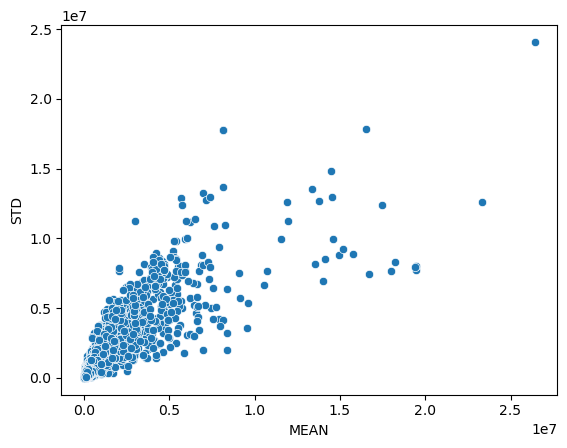

In [150]:
sns.scatterplot(data=MCOD, x='MEAN', y='STD')

# 1 사분면(왼쪽 위) - x outier  : 평균이 낮고, 표준편차 높음 --> feature가 이상하다 
# 2 사분면(오른쪽 위) - abnormal sample : 그냥 총체적 난국이다.
# 3 사분면(왼쪽 아래) - normal samples : 오차 평균이 낮음, 표준편차 낮음 : 알고리즘이 일관성 있게 예측
# 4 사분면(오른쪽 아래) - y outlier : 오차 평균이 높음, 표준편차 낮음 --> 일관성 있는 틀린값, y가 이상함